In [2]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers
import keras_tuner as kt
from sklearn.model_selection import train_test_split

#Dados disponíveis para pesca industrial
ano = np.array([1962,1963,1964,1966,1967,1981,1982,1983,1984,1985,1986,1987,1988,1989,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2017,2018,2019,2020,2021,2022])
pesca_art = np.array([2,70,600,32,59,5,9,53,23,21,35,44,42,44,250.5,584.5,287,241.5,237.5,261,269.5,318,166.5,251.333,245.278,221.037,147.403,73.770,0.136,0.300,23.311,62.650,45.151,28.364,31.531,41.984])


ano_media = np.mean(ano)
ano_std = np.sqrt( np.sum((ano - ano_media)**2)/35  )
ano_normalizado = (ano - ano_media)/ano_std

pa_media = np.mean(pesca_art)
pa_std = np.sqrt( np.sum((pesca_art - pa_media)**2)/35  )
pa_normalizado = (pesca_art - pa_media)/pa_std

#Colocando dados normalizados no formato de entrada da rede
ano_normalizado = ano_normalizado.reshape((36,1))
pa_normalizado = pa_normalizado.reshape((36,1))


#Dados a serem preditos e normalização
anos_sem_pesca_art = np.array([1965,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1990,1991,1992,1993,1994,1995,1996,1997,1998,2015,2016])

aspa_media = np.mean(anos_sem_pesca_art)
aspa_std = np.sqrt( np.sum((anos_sem_pesca_art - aspa_media)**2)/24  )
aspa_normalizado = (anos_sem_pesca_art - aspa_media)/aspa_std
aspa_normalizado = aspa_normalizado.reshape(25,1)

In [ ]:
#Fit do modelo e salvando seus pesos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
model.fit(ano_normalizado,pa_normalizado, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Projeto da pesca/Mexilhão/pesos pesca art/.weights.h5', overwrite=True)

#Loss da rede com os pesos salvos
#Epoch 500/500
#2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.4244

In [7]:
#Pegando o modelo pesos salvos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras')
model.load_weights('/home/andre/Área de Trabalho/Projeto da pesca/Mexilhão/pesos pesca art/.weights.h5')

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Previsões dos dados ausentes: [[ 96.24167 ]
 [ 52.99668 ]
 [ 38.84028 ]
 [ 25.627945]
 [ 17.548141]
 [ 18.17202 ]
 [ 20.29007 ]
 [ 22.690186]
 [ 26.011337]
 [ 30.606483]
 [ 37.096764]
 [ 43.314697]
 [ 78.10304 ]
 [163.85045 ]
 [219.69269 ]
 [198.9089  ]
 [203.35696 ]
 [231.11446 ]
 [191.4689  ]
 [ 97.50813 ]
 [ 22.791893]
 [ 16.314072]
 [ 22.009033]
 [ 61.107277]
 [ 62.91295 ]]


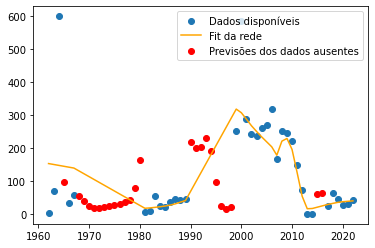

In [12]:
#Previsões
prev_geral = model.predict(ano_normalizado)*pa_std + pa_media
prev_ausentes = model.predict(aspa_normalizado)*pa_std + pa_media

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(ano,pesca_art,label='Dados disponíveis')
f1.plot(ano,prev_geral,color='orange', label='Fit da rede' )
f1.scatter(anos_sem_pesca_art,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()